In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-04-30 00:50:08.937624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Read in data and replace all instances of a slash, which indicates a new line, with a spaced slash, so that it can be tokenized.

In [2]:
data = pd.read_csv('../data/haiku.csv')
data = data.replace("/", " / ", regex=True)
data = data.dropna()
data.head()

,Unnamed: 0,id,processed_title,ups,keywords
0,0,1020ac,There's nothing inside / There is nothing outs...,5,"[('inside', 0.5268), ('outside', 0.3751), ('se..."
1,1,107cob,From whole we crumble / Forever lost to chaos ...,1,"[('chaos', 0.5962), ('crumble', 0.4749), ('for..."
2,2,109a51,Indistinctiveness / Immeasurability / Capitalism,3,"[('indistinctiveness', 0.7664), ('immeasurabil..."
3,3,10eysi,Internet is down / Obligations go bye-bye / Of...,9,"[('office', 0.5033), ('obligations', 0.4663), ..."
4,4,10f79k,Cotton in my mouth / Needles in my blood and b...,1,"[('needles', 0.5314), ('cotton', 0.4806), ('bl..."


In [3]:
def tokenize(sentence: str):
    tokens = sentence.lower().split()
    tokens = [process_token(t) for t in tokens]
    return tokens

def process_token(token: str):
    if token.strip() == "/":
        return token
    return re.sub(r'[^\w\s]', '', token.strip())

def vectorize(tokens):
    vocab, index = {}, 1
    vocab['<pad>'] = 0
    for token in tokens:
        token = token.strip()
        if token not in vocab:
            vocab[token] = index
            index += 1
    return vocab

def find_max_length(vectorized_poems):
    max_length = 0
    for poem in vectorized_poems:
        max_length = max(max_length, len(poem))   
    return max_length

In [4]:
all_text = " ".join(data["processed_title"].to_list())
tokens = tokenize(all_text)
vocab_map = vectorize(tokens)

In [5]:
data["vectorized"] = data["processed_title"].apply(lambda x: [vocab_map[t] for t in tokenize(x)])
data = data[[a.count(4) <= 2 for a in data['vectorized']]]
max_length = find_max_length(data["vectorized"])
data = data[data['vectorized'].apply(lambda x: len(x) <= 19)]
data.head()

,Unnamed: 0,id,processed_title,ups,keywords,vectorized
0,0,1020ac,There's nothing inside / There is nothing outs...,5,"[('inside', 0.5268), ('outside', 0.3751), ('se...","[1, 2, 3, 4, 5, 6, 2, 7, 8, 4, 9, 10, 11, 12, 13]"
1,1,107cob,From whole we crumble / Forever lost to chaos ...,1,"[('chaos', 0.5962), ('crumble', 0.4749), ('for...","[14, 15, 16, 17, 4, 18, 19, 20, 21, 4, 22, 23,..."
2,2,109a51,Indistinctiveness / Immeasurability / Capitalism,3,"[('indistinctiveness', 0.7664), ('immeasurabil...","[25, 4, 26, 4, 27]"
3,3,10eysi,Internet is down / Obligations go bye-bye / Of...,9,"[('office', 0.5033), ('obligations', 0.4663), ...","[28, 6, 29, 4, 30, 31, 32, 4, 33, 34]"
4,4,10f79k,Cotton in my mouth / Needles in my blood and b...,1,"[('needles', 0.5314), ('cotton', 0.4806), ('bl...","[35, 12, 36, 37, 4, 38, 12, 36, 39, 40, 41, 4,..."


In [6]:
data["vectorized"]

0        [1, 2, 3, 4, 5, 6, 2, 7, 8, 4, 9, 10, 11, 12, 13]
1        [14, 15, 16, 17, 4, 18, 19, 20, 21, 4, 22, 23,...
2                                       [25, 4, 26, 4, 27]
3                    [28, 6, 29, 4, 30, 31, 32, 4, 33, 34]
4        [35, 12, 36, 37, 4, 38, 12, 36, 39, 40, 41, 4,...
                               ...                        
15276    [703, 663, 10471, 10405, 4, 40, 3717, 1132, 50...
15277    [9, 3739, 85, 16785, 4, 85, 9614, 31, 4572, 40...
15278    [549, 5557, 424, 47, 2293, 4, 1055, 2324, 76, ...
15279    [1084, 6422, 1464, 118, 4, 1492, 550, 20, 1106...
15280    [414, 10429, 4, 17185, 1314, 85, 927, 4, 36, 1...
Name: vectorized, Length: 15209, dtype: object

In [7]:
data_vectorized_list = data["vectorized"].to_list()
# padded_data = pad_sequences(data_vectorized_list, padding='post')
padded_data = data["vectorized"].to_list()
haikus = np.array(padded_data)
haikus

/var/folders/3s/qv0w8_2122q9y07w89thwy300000gn/T/ipykernel_27338/3005451388.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  haikus = np.array(padded_data)


array([list([1, 2, 3, 4, 5, 6, 2, 7, 8, 4, 9, 10, 11, 12, 13]),
       list([14, 15, 16, 17, 4, 18, 19, 20, 21, 4, 22, 23, 24]),
       list([25, 4, 26, 4, 27]), ...,
       list([549, 5557, 424, 47, 2293, 4, 1055, 2324, 76, 5403, 7061, 4, 17184]),
       list([1084, 6422, 1464, 118, 4, 1492, 550, 20, 1106, 1312, 4, 586, 1992, 20, 970]),
       list([414, 10429, 4, 17185, 1314, 85, 927, 4, 36, 1584, 6, 4813])],
      dtype=object)

In [28]:
window_size = 7

In [29]:
training_examples = []

for haiku in haikus:
    for i in range(len(haiku) - window_size + 1):
        input_words = haiku[i:i+window_size-1]
        output_word = haiku[i+window_size-1]
        training_examples.append((input_words, output_word))
training_examples[:20]

[([1, 2, 3, 4, 5, 6], 2),
 ([2, 3, 4, 5, 6, 2], 7),
 ([3, 4, 5, 6, 2, 7], 8),
 ([4, 5, 6, 2, 7, 8], 4),
 ([5, 6, 2, 7, 8, 4], 9),
 ([6, 2, 7, 8, 4, 9], 10),
 ([2, 7, 8, 4, 9, 10], 11),
 ([7, 8, 4, 9, 10, 11], 12),
 ([8, 4, 9, 10, 11, 12], 13),
 ([14, 15, 16, 17, 4, 18], 19),
 ([15, 16, 17, 4, 18, 19], 20),
 ([16, 17, 4, 18, 19, 20], 21),
 ([17, 4, 18, 19, 20, 21], 4),
 ([4, 18, 19, 20, 21, 4], 22),
 ([18, 19, 20, 21, 4, 22], 23),
 ([19, 20, 21, 4, 22, 23], 24),
 ([28, 6, 29, 4, 30, 31], 32),
 ([6, 29, 4, 30, 31, 32], 4),
 ([29, 4, 30, 31, 32, 4], 33),
 ([4, 30, 31, 32, 4, 33], 34)]

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SimpleRNN, GRU, Dropout, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()

In [31]:
vocab_size = len(vocab_map)
embedding_size = 100
input_length = window_size - 1
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=input_length),
    LSTM(50),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


In [32]:
import keras.backend as K
def masked_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, 0), K.floatx())
    loss = K.sparse_categorical_crossentropy(y_true, y_pred)
    masked_loss = loss * mask
    return K.sum(masked_loss) / K.sum(mask)

In [33]:
x = np.array([example[0] for example in training_examples[:80000]])
y = np.array([example[1] for example in training_examples[:80000]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=42)

In [34]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss=masked_loss, optimizer=optimizer, metrics=['accuracy'])

In [52]:
tf.keras.backend.clear_session()
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
563/563 [==============================] - 36s 62ms/step - loss: 648.4528 - accuracy: 0.2024 - val_loss: 962.6495 - val_accuracy: 0.1501
Epoch 2/5
563/563 [==============================] - 37s 65ms/step - loss: 629.1323 - accuracy: 0.2147 - val_loss: 1009.1882 - val_accuracy: 0.1515
Epoch 3/5
563/563 [==============================] - 35s 62ms/step - loss: 606.9632 - accuracy: 0.2266 - val_loss: 1049.4169 - val_accuracy: 0.1464
Epoch 4/5
563/563 [==============================] - 36s 64ms/step - loss: 583.8444 - accuracy: 0.2382 - val_loss: 1118.8728 - val_accuracy: 0.1435
Epoch 5/5
563/563 [==============================] - 35s 63ms/step - loss: 561.1738 - accuracy: 0.2520 - val_loss: 1190.0549 - val_accuracy: 0.1416


<AxesSubplot:>

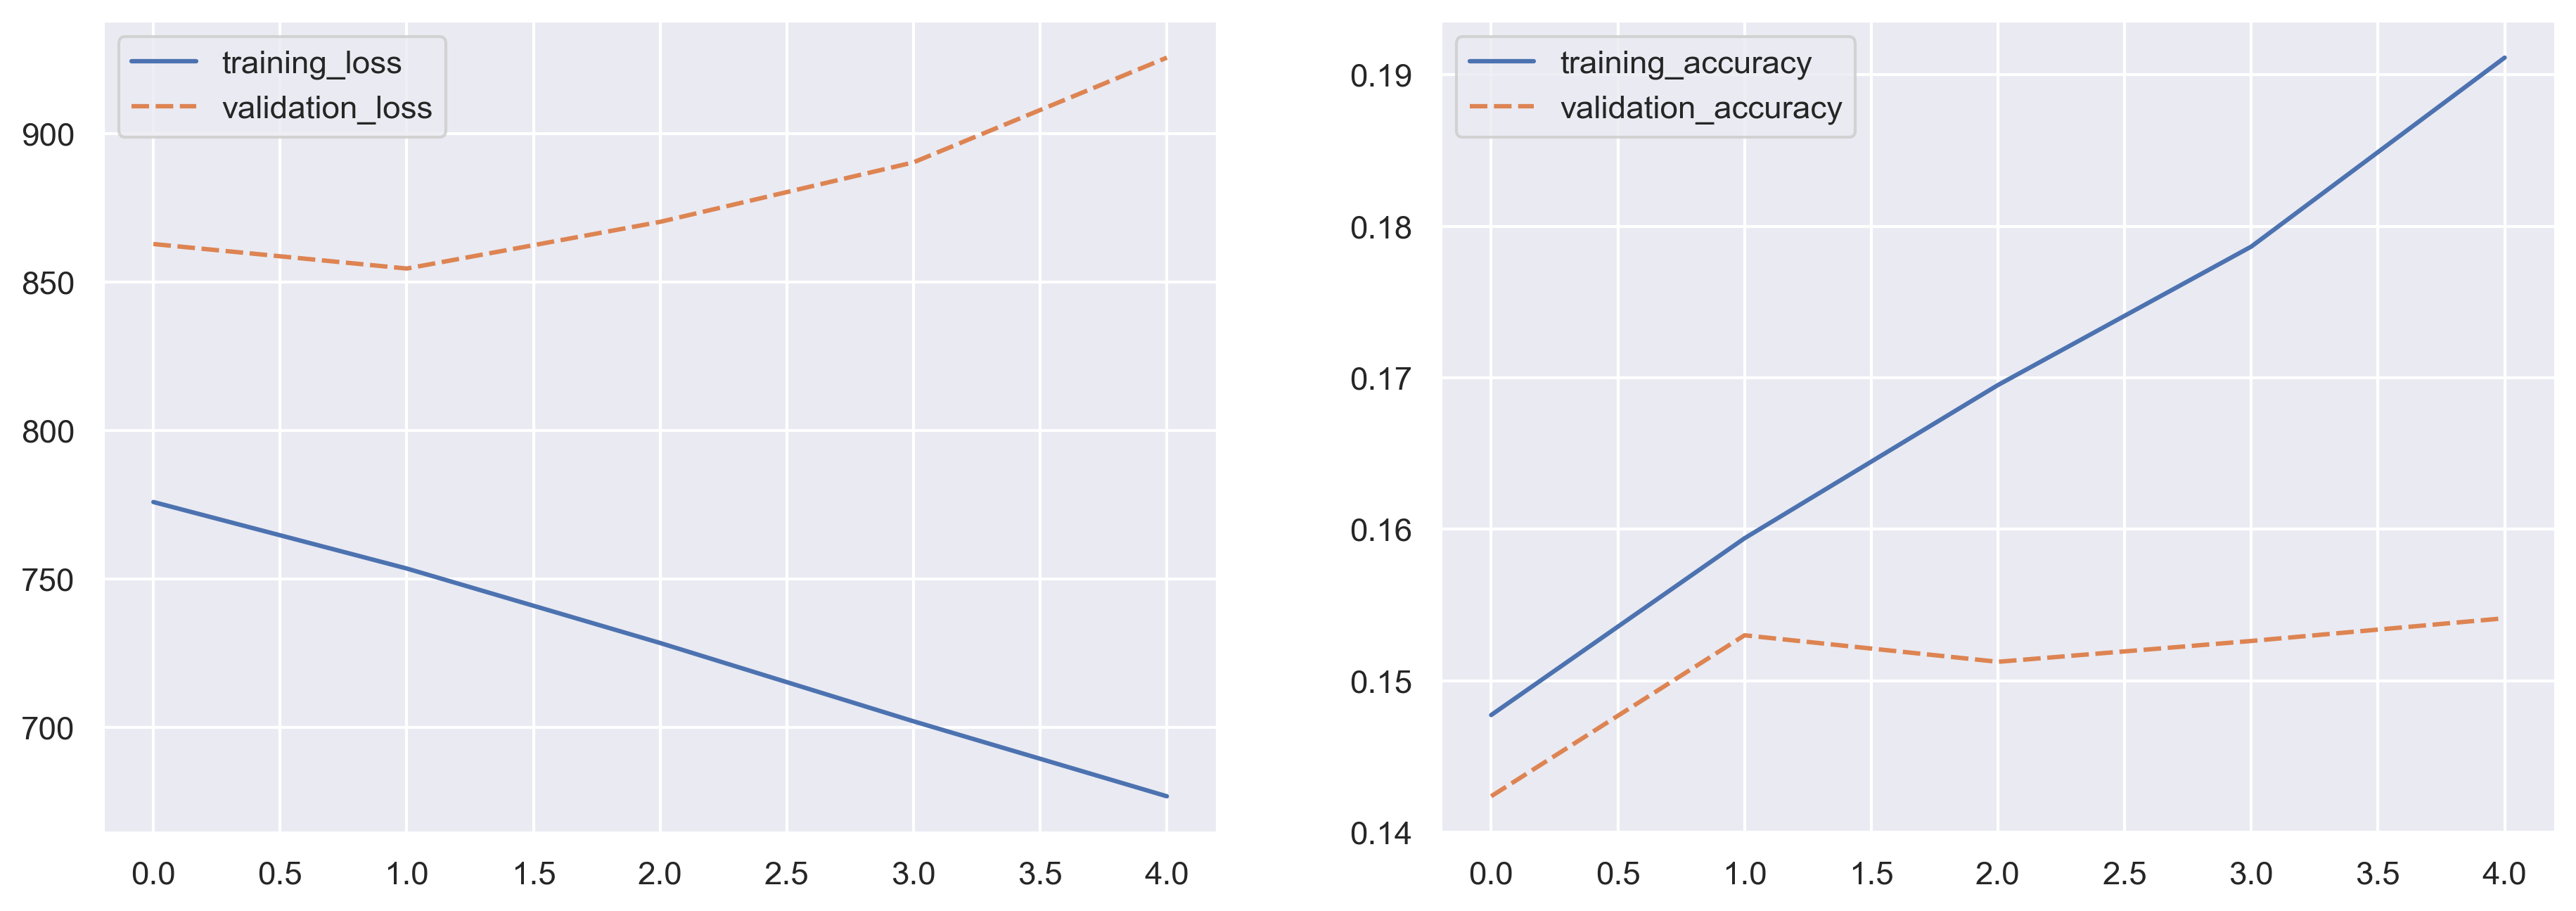

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi": 300})

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
losses = pd.DataFrame({"training_loss":history.history['loss'],"validation_loss":history.history['val_loss']})
accs = pd.DataFrame({"training_accuracy":history.history['accuracy'],"validation_accuracy":history.history['val_accuracy']})
sns.lineplot(losses, ax = ax[0])
sns.lineplot(accs, ax = ax[1])

In [38]:
vocab_map_inv = dict([(value, key) for key, value in vocab_map.items()])

In [44]:
def generate_poem(input_words: list):
    while len(input_words) < window_size - 1:
        input_words.insert(0, "<pad>")
    vectorized_input = [vocab_map[word] for word in input_words]
    print(f"User specified words {input_words} which were vectorized as {vectorized_input}")
    output_poem = input_words
    
    for i in range(50):
        input = np.array(vectorized_input[i:i+window_size-1]).reshape((1, window_size-1))
        prediction = np.array(model.predict(input, verbose=0))
        # new_word_vector = (prediction[0].argsort()[::-1])[np.random.randint(0,1)]
        new_word_vector = (prediction[0].argsort()[::-1])[0]
        vectorized_input.append(new_word_vector)
        new_word = vocab_map_inv[new_word_vector]
        output_poem.append(new_word)
    output = " ".join(output_poem)
    print(f"OUTPUT POEM: {output}")

In [45]:
generate_poem(["once", "i"])

User specified words ['<pad>', '<pad>', '<pad>', '<pad>', 'once', 'i'] which were vectorized as [0, 0, 0, 0, 1587, 9]
OUTPUT POEM: <pad> <pad> <pad> <pad> once i / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i


In [41]:
generate_poem(["college", "students", "are"])

User specified words ['<pad>', '<pad>', '<pad>', 'college', 'students', 'are'] which were vectorized as [0, 0, 0, 3571, 4015, 76]
OUTPUT POEM: <pad> <pad> <pad> college students are / i am i am you / i am i have


In [42]:
generate_poem(["fun", "today", "and", "tomorrow"])

User specified words ['<pad>', '<pad>', 'fun', 'today', 'and', 'tomorrow'] which were vectorized as [0, 0, 156, 620, 40, 1543]
OUTPUT POEM: <pad> <pad> fun today and tomorrow / i am i have you / i am i have


In [43]:
generate_poem(["the", "bear", "and", "i", "will"])

User specified words ['<pad>', 'the', 'bear', 'and', 'i', 'will'] which were vectorized as [0, 85, 968, 40, 9, 160]
OUTPUT POEM: <pad> the bear and i will / i am i have you / i am i have


In [46]:
generate_poem(["you","are", "a", "beautiful", "lake", "and", "/"])

User specified words ['you', 'are', 'a', 'beautiful', 'lake', 'and', '/'] which were vectorized as [113, 76, 47, 1224, 1348, 40, 4]
OUTPUT POEM: you are a beautiful lake and / / i i am am i to know / / i i am am i to know / / i i am am i to know / / i i am am i to know / / i i am am i to know / / i i am am


In [47]:
def pick_random_words(vocab_map, number):
    vocabs = list(vocab_map.keys())
    inds = list(np.random.randint(0, len(vocabs), number))
    output_words = []
    for i in inds:
        output_words.append(vocabs[i])
    return output_words

In [50]:
generate_poem(pick_random_words(vocab_map, window_size-1))

User specified words ['firepower', 'gumdrop', 'tap', 'orthopedic', 'tripping', 'pictures'] which were vectorized as [12858, 13917, 12083, 16606, 3712, 1240]
OUTPUT POEM: firepower gumdrop tap orthopedic tripping pictures / and a heart of the sun / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you /


In [51]:
generate_poem(pick_random_words(vocab_map, 5))

User specified words ['<pad>', 'orgasm', 'valentines', 'stranded', 'baton', 'note'] which were vectorized as [0, 14211, 3533, 14449, 11533, 7686]
OUTPUT POEM: <pad> orgasm valentines stranded baton note / and a sun and haiku / i am i am you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i am i have you / i


In [ ]:
generate_poem(["hi", "park", "ball", "stick", "water"])